# New York Housing Prices

## Importing the Dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [3]:
df = pd.read_csv('NY-House-Dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

*We don't have to deal with any null values*

In [5]:
df.sample(2)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
3739,Brokered by Elite Home Sales Inc,House for sale,1248000,4,2.000000,2450.000000,3007 Avenue S,"Brooklyn, NY 11229","3007 Avenue SBrooklyn, NY 11229",11229,United States,New York,Kings County,Avenue S,"3007 Ave. S, Brooklyn, NY 11229, USA",40.605613,-73.939675
1805,Brokered by Douglas Elliman - 3544 Johnson Ave,Multi-family home for sale,14000000,3,2.373861,2184.207862,3641 Johnson Ave,"Bronx, NY 10463","3641 Johnson AveBronx, NY 10463",United States,New York,Bronx County,The Bronx,Johnson Avenue,"3641 Johnson Ave, Bronx, NY 10463, USA",40.887929,-73.909666


*Let's get rid of some of the unnecessary columns and some redundant information which we don't need for our analysis* 

## Data Cleaning:

In [6]:
df['broker_title'] = df['BROKERTITLE'].apply(lambda x : ' '.join(x.split()[2:]))

In [7]:
df['type'] = df['TYPE'].apply(lambda x : x.replace(' for sale',''))

In [8]:
df['zip_code'] = df['STATE'].apply(lambda x : x.split()[-1]) 

In [9]:
df.drop(['BROKERTITLE','TYPE','STATE','MAIN_ADDRESS','ADMINISTRATIVE_AREA_LEVEL_2','LOCALITY','STREET_NAME','LONG_NAME',
         'FORMATTED_ADDRESS','LATITUDE','LONGITUDE'], axis=1, inplace=True)

In [10]:
df.rename(columns={'PRICE':'price','BEDS':'beds','BATH':'bath','PROPERTYSQFT':'sqft','ADDRESS':'address',
                   'SUBLOCALITY':'locality'}, inplace = True)

In [11]:
df.loc[df['broker_title']=='EXP Realty','broker_title'] = 'Exp Realty'

In [12]:
new_column_order = ['broker_title','type','price','beds','bath','sqft','address','locality','zip_code']

df = df[new_column_order]

In [13]:
df.sample(2)

,broker_title,type,price,beds,bath,sqft,address,locality,zip_code
3229,Douglas Elliman - 575 Madison Ave,Co-op,5400000,4,2.0,3800.0,14 Wooster St Apt 4,New York,10013
4624,Charles H. Greenthal Property,Pending,399000,1,2.0,1341.0,26910 Grand Central Pkwy Apt 2V,Queens,11005


*Now let's dig into the qunatitive data to get a better understanding before starting our analysis*

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4801.0,2.356940e+06,3.135525e+07,2494.0,499000.0,825000.000000,1.495000e+06,2.147484e+09
beds,4801.0,3.356801e+00,2.602315e+00,1.0,2.0,3.000000,4.000000e+00,5.000000e+01
bath,4801.0,2.373861e+00,1.946962e+00,0.0,1.0,2.000000,3.000000e+00,5.000000e+01
sqft,4801.0,2.184208e+03,2.377141e+03,230.0,1200.0,2184.207862,2.184208e+03,6.553500e+04


**A very high standard deviation in price (over 31 million) suggests a wide range of property values, possibly including both very high and very low-priced properties.**

*We will try to remove some of the outliers in order to reduce that deviation otherwise it might skew our analysis*

## Removing Outliers:

In [15]:
def remove_outliers(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = df[(df[column]>=lower_bound) & (df[column]<=upper_bound)]
    return filtered_data

In [16]:
filtered_df = df.copy()

for col in ['price','beds','bath','sqft']:
    filtered_df = remove_outliers(filtered_df,col)

In [17]:
filtered_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,3659.0,792782.089642,539472.505126,2494.0,399000.0,675000.0,995000.000000,2980000.0
beds,3659.0,2.621755,1.307809,1.0,2.0,3.0,3.000000,7.0
bath,3659.0,1.705664,0.662121,0.0,1.0,2.0,2.000000,3.0
sqft,3659.0,1641.693018,663.586659,230.0,1025.0,1784.0,2184.207862,3850.0


*Lets start our analysis now*

## Exploratory Data Analysis:

In [18]:
print(filtered_df['broker_title'].nunique())

923


*There are 923 different brokers in the market*

In [19]:
print(filtered_df['type'].nunique())
print(filtered_df['type'].unique())

13
['Condo' 'House' 'Co-op' 'Townhouse' 'Multi-family home' 'Contingent'
 'Land' 'Foreclosure' 'Pending' 'For sale' 'Coming Soon' 'Mobile house'
 'Condop']


*There are 13 different types of houses listed for sale*

In [20]:
print(filtered_df['locality'].nunique())
print(filtered_df['locality'].unique())

20
['Manhattan' 'Richmond County' 'New York County' 'New York' 'East Bronx'
 'Brooklyn' 'The Bronx' 'Queens' 'Staten Island' 'Queens County'
 'Bronx County' 'Kings County' 'Coney Island' 'Brooklyn Heights'
 'Jackson Heights' 'Riverdale' 'Rego Park' 'Fort Hamilton' 'Flushing'
 'Snyder Avenue']


*There are 20 different areas of New York from where we have got these listings*

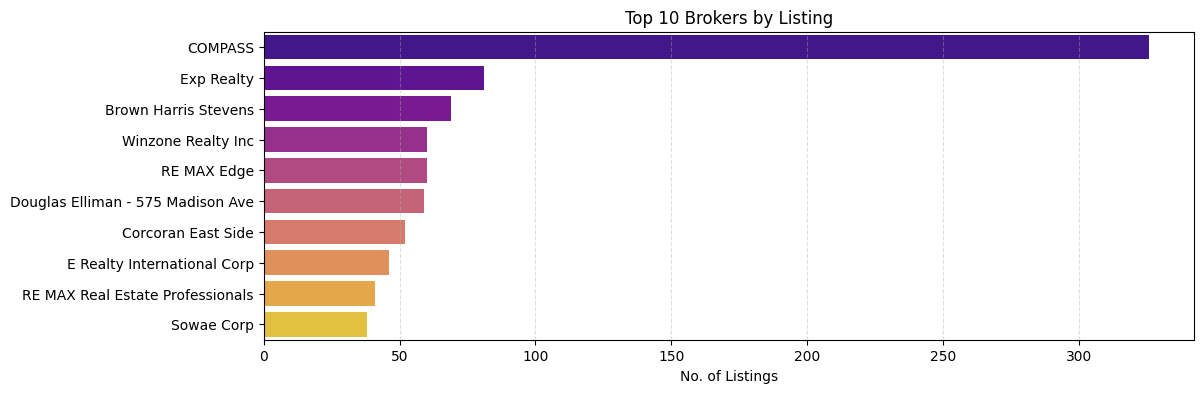

In [21]:
broker_count = filtered_df['broker_title'].value_counts().nlargest(10).reset_index()

plt.figure(figsize=(12,4))

sns.barplot(data=broker_count,x='count',y='broker_title',palette='plasma')

plt.grid(axis='x',ls='--',alpha=0.4)
plt.title('Top 10 Brokers by Listing')
plt.xlabel('No. of Listings')
plt.ylabel('')

plt.show()

*COMPASS leads the way with more than 300 listings among the top 10 brokerage agencies in New York.*

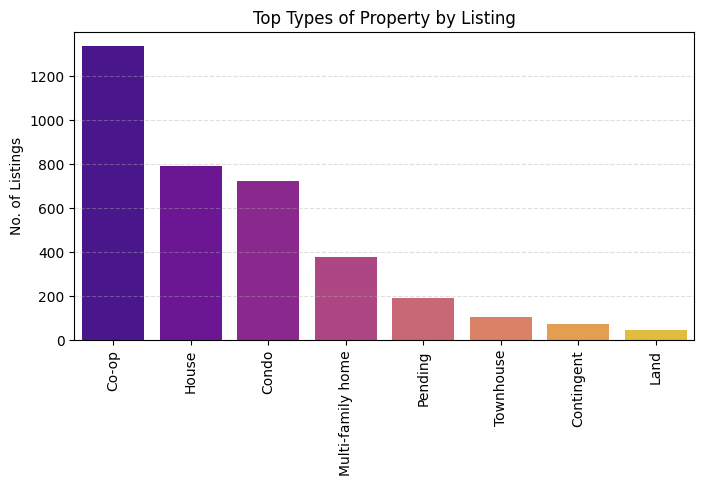

In [22]:
type_counts = filtered_df['type'].value_counts().reset_index().nlargest(n=8,columns='count')

plt.figure(figsize=(8,4))

sns.barplot(data=type_counts,x='type',y='count',palette='plasma')

plt.grid(axis='y',ls='--',alpha=0.4)
plt.title('Top Types of Property by Listing')
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('No. of Listings')

plt.show()

*The majority of listed properties were classified as Co-op i.e Cooperatives, with individual houses and Condominiums following closely behind.*

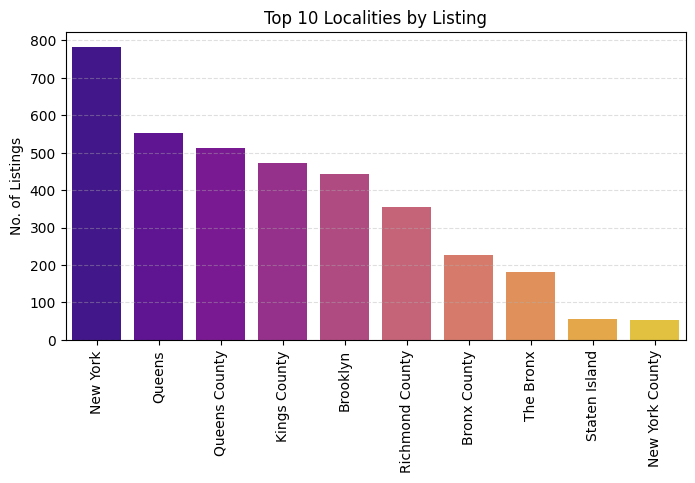

In [23]:
locality_count = filtered_df['locality'].value_counts().reset_index().nlargest(n=10,columns='count')

plt.figure(figsize=(8,4))

sns.barplot(data=locality_count,x='locality',y='count',palette='plasma')

plt.grid(axis='y',ls='--',alpha=0.4)
plt.title('Top 10 Localities by Listing')
plt.xlabel('')
plt.ylabel('No. of Listings')
plt.xticks(rotation=90)

plt.show()

*The majority of listings originated from the New York borough, with Queens, Kings, and Brooklyn also prominently represented.*

**Note: While Queens and Queens County refer to the same geographical area, administratively they are distinct boroughs. The same distinction applies to Kings and Bronx boroughs.**

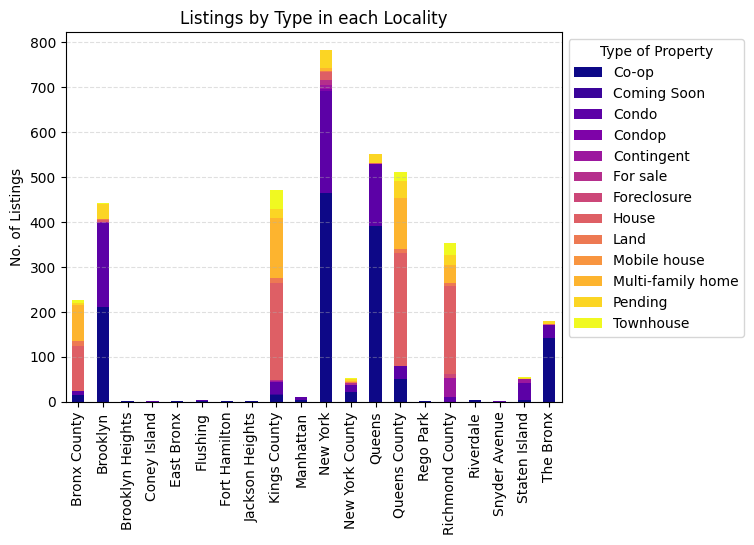

In [24]:
pivot_df = filtered_df.groupby(by=['locality','type']).size().unstack(fill_value=0)

pivot_df.plot(kind='bar',stacked=True,colormap='plasma')

plt.grid(axis='y',ls='--',alpha=0.4)
plt.title('Listings by Type in each Locality')
plt.xlabel('')
plt.ylabel('No. of Listings')
plt.legend(title='Type of Property',loc='upper left',bbox_to_anchor=(1,1))

plt.show()

*Here we observe varying compositions of listed property types across different boroughs. In New York and Queens boroughs, the majority of listed properties were Cooperatives, with condominiums following closely behind. Conversely, in counties like Richmond, Bronx, Queens, and Kings, the majority of listed properties consist of individually owned houses. In Brooklyn, co-ops and condos contribute equally to the listings.*

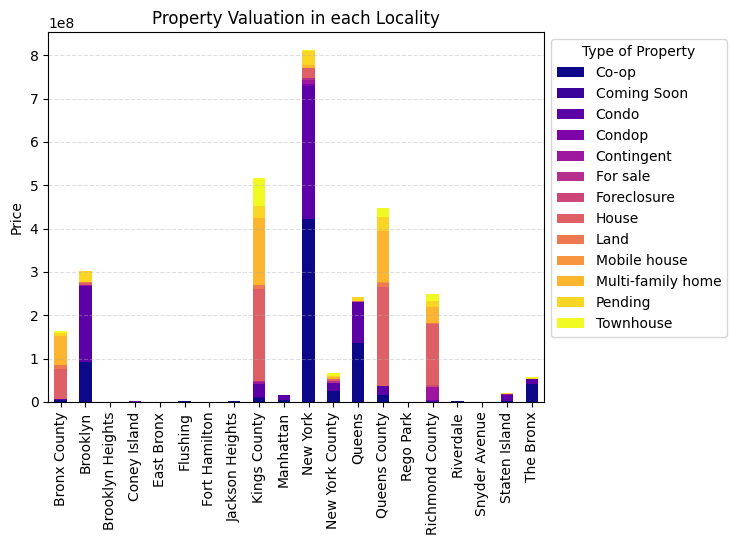

In [25]:
value_df = pd.pivot_table(data=filtered_df,index='locality',columns='type',values='price',aggfunc='sum',fill_value=0)

value_df.plot(kind='bar',stacked=True,colormap='plasma')

plt.grid(axis='y',ls='--',alpha=0.4)
plt.title('Property Valuation in each Locality')
plt.xlabel('')
plt.ylabel('Price')
plt.legend(title='Type of Property',loc='upper left',bbox_to_anchor=(1,1))

plt.show()

*Here, we gain insight into the investment opportunities presented by various localities. Returns on investment are expected to favor cooperatives and condominiums in the city center, while individual houses and mobile houses in the counties are anticipated to yield better returns.*

*Now, let's examine the distribution of prices and how they relate to various attributes of the houses.*

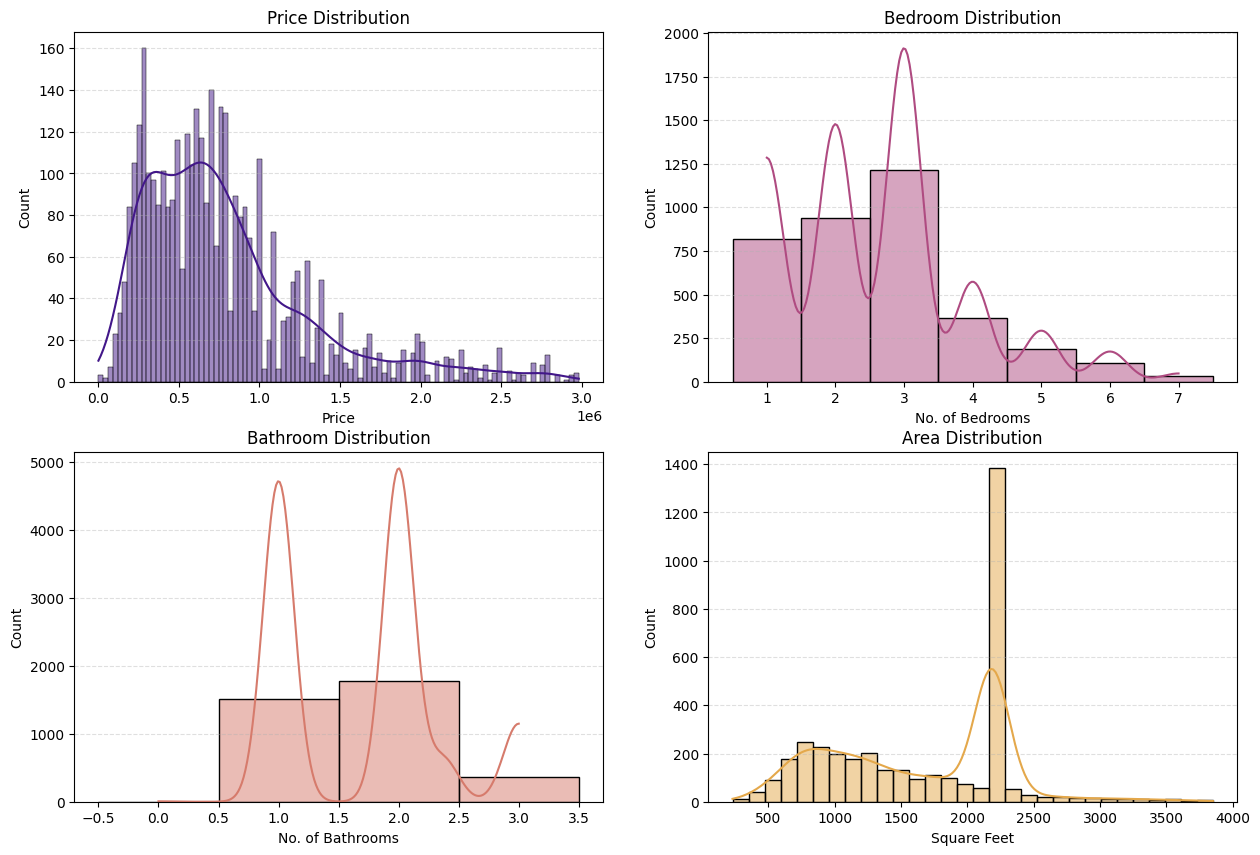

In [26]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.histplot(data=filtered_df,x='price',kde=True,bins=100,color='#421789',)
plt.grid(axis='y',ls='--',alpha=0.4)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')

plt.subplot(2,2,2)
sns.histplot(data=filtered_df,x='beds',discrete=True,kde=True,color='#AF4B81')
plt.grid(axis='y',ls='--',alpha=0.4)
plt.title('Bedroom Distribution')
plt.xlabel('No. of Bedrooms')
plt.ylabel('Count')

plt.subplot(2,2,3)
sns.histplot(data=filtered_df,x='bath',discrete=True,kde=True,color='#D67B6C')
plt.grid(axis='y',ls='--',alpha=0.4)
plt.title('Bathroom Distribution')
plt.xlabel('No. of Bathrooms')
plt.ylabel('Count')

plt.subplot(2,2,4)
sns.histplot(data=filtered_df,x='sqft',kde=True,bins=30,color='#E4A84B')
plt.grid(axis='y',ls='--',alpha=0.4)
plt.title('Area Distribution')
plt.xlabel('Square Feet')
plt.ylabel('Count')

plt.show()

*The price distribution in our dataset, ranges from 2.4K USD to just under 3 million USD. The majority of properties consist of 1-3 bedrooms and 1-2 bathrooms, with an average area of approximately 2200 sqft.*

*Continuing forward, we created a bar chart to visually represent the median pricing of houses across different locations, 
highlighting both the top and bottom performers.*

In [27]:
grouped_df = filtered_df.groupby(by='locality').agg({'price':'median','sqft':'median','beds':'median','bath':'median'}).reset_index()

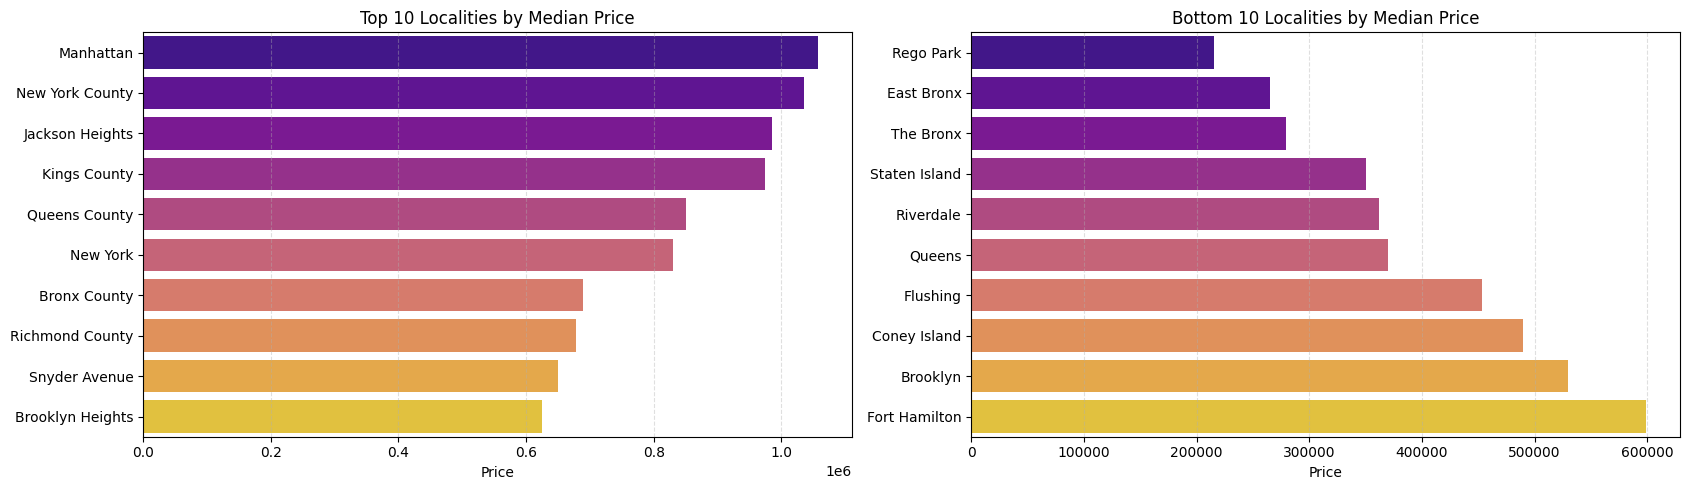

In [28]:
plt.figure(figsize=(17,5))

plt.subplot(1,2,1)
sns.barplot(data=grouped_df.sort_values(by='price',ascending=False).head(10),x='price',y='locality',palette='plasma')
plt.grid(axis='x',ls='--',alpha=0.4)
plt.title('Top 10 Localities by Median Price')
plt.xlabel('Price')
plt.ylabel('')

plt.subplot(1,2,2)
sns.barplot(data=grouped_df.sort_values(by='price').head(10),x='price',y='locality',palette='plasma')
plt.grid(axis='x',ls='--',alpha=0.4)
plt.title('Bottom 10 Localities by Median Price')
plt.xlabel('Price')
plt.ylabel('')
plt.tight_layout()

plt.show()

*Manhattan stands out as the most upscale area with the median price going over 1 million USD for properties, whereas Rego Park is recognized as the most affordable locality with the median price being a little over 200K USD.*

*Now we will do the same but in terms of Square Footage*

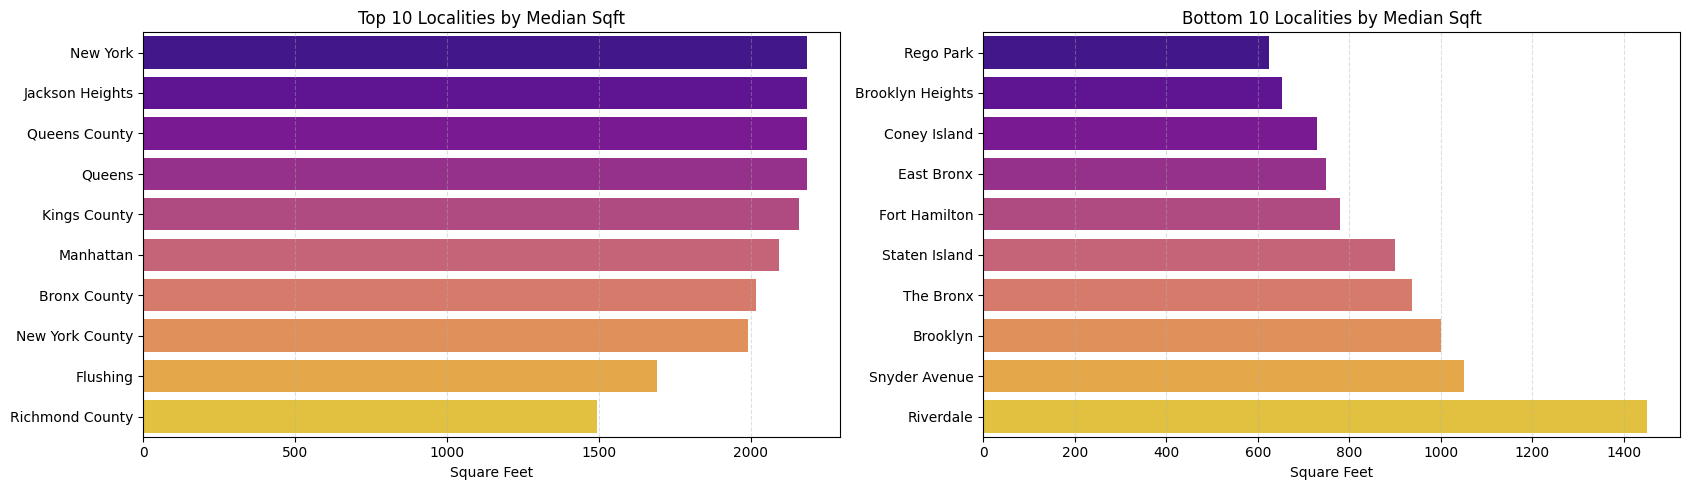

In [29]:
plt.figure(figsize=(17,5))

plt.subplot(1,2,1)
sns.barplot(data=grouped_df.sort_values(by='sqft',ascending=False).head(10),x='sqft',y='locality',palette='plasma')
plt.grid(axis='x',ls='--',alpha=0.4)
plt.title('Top 10 Localities by Median Sqft')
plt.xlabel('Square Feet')
plt.ylabel('')

plt.subplot(1,2,2)
sns.barplot(data=grouped_df.sort_values(by='sqft').head(10),x='sqft',y='locality',palette='plasma')
plt.grid(axis='x',ls='--',alpha=0.4)
plt.title('Bottom 10 Localities by Median Sqft')
plt.xlabel('Square Feet')
plt.ylabel('')
plt.tight_layout()

plt.show()

*In terms of square footage, Rego Park stands out with the smallest median property area, just slightly exceeding 600 square feet. This aligns with the region's lower property prices. On the other hand, New York, Jackson Heights, and Queens occupy the top four spots for properties with median square footage exceeding 2000. Meanwhile, Manhattan appears to be experiencing overpricing compared to other regions.*

In [30]:
key_type = ['Condo','House','Co-op','Townhouse','Multi-family home',
           'Contingent','Land','Foreclosure']

type_df = filtered_df[filtered_df['type'].isin(key_type)]

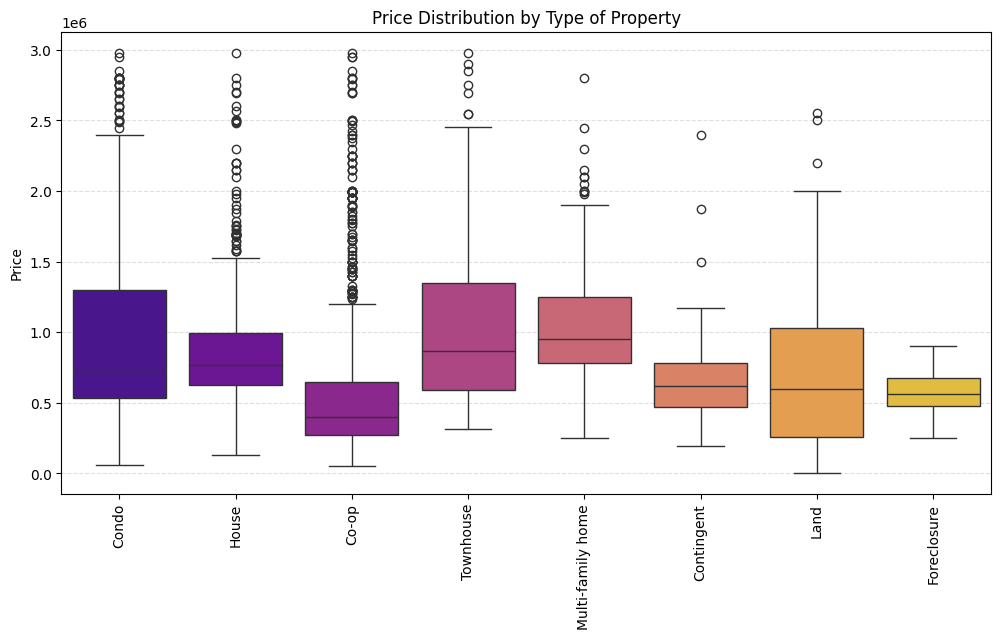

In [31]:
plt.figure(figsize=(12,6))

sns.boxplot(data=type_df,x='type',y='price',palette='plasma')
plt.xticks(rotation=90)
plt.grid(axis='y',ls='--',alpha=0.4)
plt.title('Price Distribution by Type of Property')
plt.xlabel('')
plt.ylabel('Price')

plt.show()

*When analyzing the price distribution of certain key property types, we gain insight into the median price of each property type. However, the overall price range can vary significantly, influenced by factors such as location and the broker involved, making it a subjective measure.*

In [32]:
key_areas = ['Manhattan','Jackson Heights','New York County','Richmond County','Brooklyn','Queens','Staten Island','Riverdale']

key_data = filtered_df[filtered_df['locality'].isin(key_areas)]

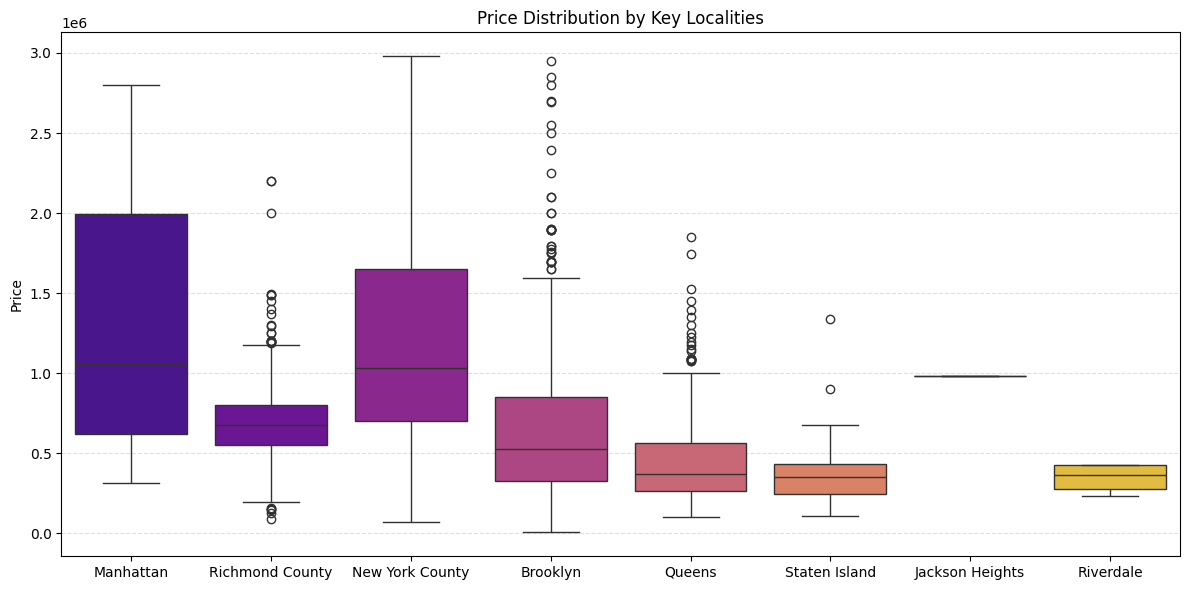

In [33]:
plt.figure(figsize=(12,6))

sns.boxplot(data=key_data,x='locality',y='price',palette='plasma')

plt.grid(axis='y',ls='--',alpha=0.4)
plt.title('Price Distribution by Key Localities')
plt.xlabel('')
plt.ylabel('Price')
plt.tight_layout()

plt.show()

*We examine the price distribution in several key localities. Riverdale, Jackson Heights, and Staten Island exhibit relatively stable pricing ranges. However, pricing in Brooklyn, Queens, and to some extent Richmond County is influenced by subjective factors. Additionally, Manhattan and New York display a diverse range of pricing overall.*

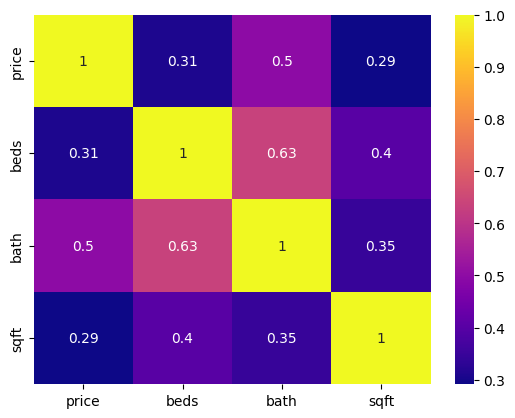

In [34]:
corr_col = ['price','beds','bath','sqft']

corr_data = filtered_df[corr_col].corr()

sns.heatmap(data=corr_data,annot=True,cmap='plasma')

plt.show()

*Square footage shares a direct positive correlation with price, number of bedrooms, and number of bathrooms. This implies that a larger area tends to result in more bedrooms and bathrooms, consequently leading to higher costs.*

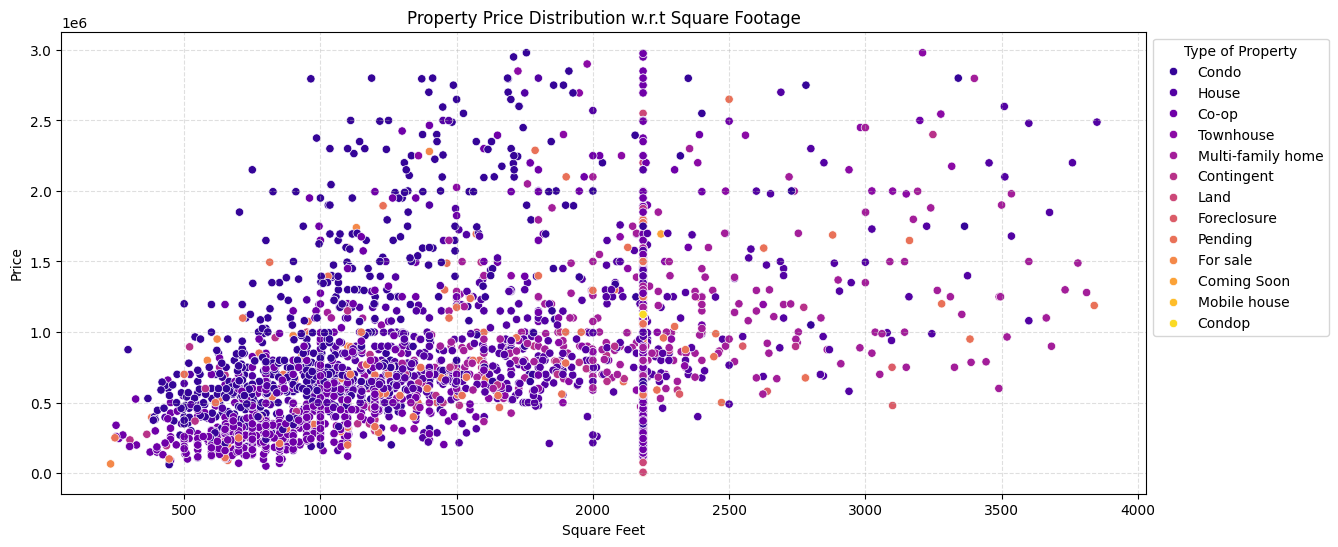

In [35]:
plt.figure(figsize=(14,6))

sns.scatterplot(data=filtered_df,x='sqft',y='price',hue='type',palette='plasma')

plt.grid(axis='both',ls='--',alpha=0.4)
plt.title('Property Price Distribution w.r.t Square Footage')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.legend(title='Type of Property',loc='upper left',bbox_to_anchor=(1,1))

plt.show()

*The most opportunistic investment prospects lie within property types ranging from 500 to 2000 square feet in area, priced under a million USD.*

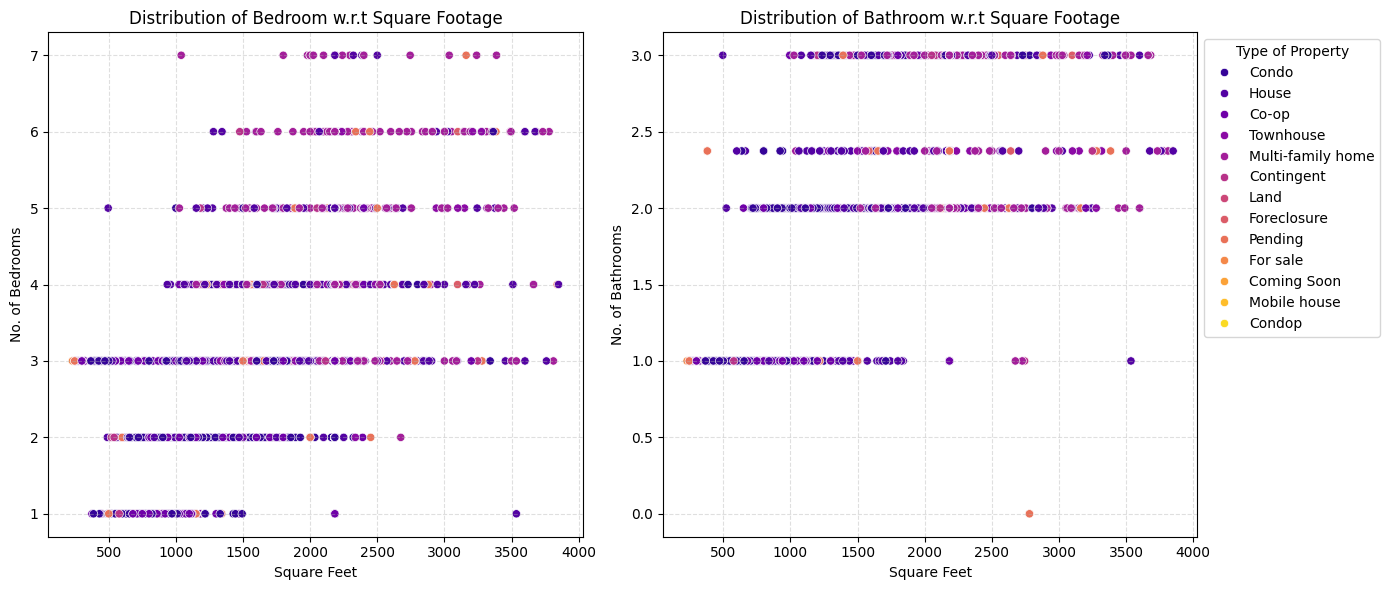

In [36]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.scatterplot(data=filtered_df,x='sqft',y='beds',hue='type',palette='plasma')
plt.grid(axis='both',ls='--',alpha=0.4)
plt.title('Distribution of Bedroom w.r.t Square Footage')
plt.xlabel('Square Feet')
plt.ylabel('No. of Bedrooms')
plt.legend().remove()

plt.subplot(1,2,2)
sns.scatterplot(data=filtered_df,x='sqft',y='bath',hue='type',palette='plasma')
plt.grid(axis='both',ls='--',alpha=0.4)
plt.title('Distribution of Bathroom w.r.t Square Footage')
plt.xlabel('Square Feet')
plt.ylabel('No. of Bathrooms')
plt.legend(title='Type of Property',loc='upper left',bbox_to_anchor=(1,1))

plt.tight_layout()

plt.show()

*Here we observe a linear relationship between the number of bedrooms and bathrooms with square footage, as established in the correlation section. As the area increases, the number of bathrooms and bedrooms also tends to increase.*

## The End